# Data Science Group Project Report 006-021
## Heart Disease Hungarian Data:
##### Members: 
- Jaden Lai (79465795)
- Percy Pham (70210562)
- Sydney Trim (86059649)

#### Introduction:
Heart disease is a major cause of death globally, with several factors contributing to its development. The objective of this project is to determine which patients are at the highest risk of developing heart disease by examining their age, resting blood pressure, maximum heart rate, and cholesterol levels. We will achieve this by analyzing the Heart Disease Dataset from the Hungarian Institute of Cardiology. This dataset contains fourteen attributes, but we will focus on five of them to address our research question.

#### Question: 
Which patients are most likely to develop heart disease based on their age, resting blood pressure, maximum heart rate, and cholesterol levels

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Methods & Results

We will begin by downloading, cleaning, and wrangling the dataset. This includes assigning column names, selecting our variables of interest, modifying variable types, and filtering out missing cells. These pre-processing steps are necessary to analyze the heart disease dataset.

In [4]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", "project.csv")
heart_disease_hungarian <- read_csv("project.csv", col_names = FALSE)
colnames(heart_disease_hungarian) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol",
                                       "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", 
                                       "exercise_induced_angina", "ST_depression",
                                       "slope_of_peak_exercise_ST_segment",
                                       "number_of_major_vessels", "thalassemia", "heart_disease_cases")

heart_disease_hungarian <- heart_disease_hungarian |>
             select(age, resting_blood_pressure, maximum_heart_rate_achieved,  cholesterol, heart_disease_cases) |>
             mutate(maximum_heart_rate_achieved = as.numeric(maximum_heart_rate_achieved)) |>
             mutate(cholesterol = as.numeric(cholesterol)) |>
             mutate(resting_blood_pressure = as.numeric(resting_blood_pressure)) |>
             mutate(heart_disease_cases = as.factor(heart_disease_cases)) |>
             filter(maximum_heart_rate_achieved != "NA") |>
             filter(resting_blood_pressure != "NA") |>
             filter(age != "NA") |>
             filter(resting_blood_pressure != "NA") |>
             filter(cholesterol != "?")

heart_disease_hungarian

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,resting_blood_pressure,maximum_heart_rate_achieved,cholesterol,heart_disease_cases
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,130,185,132,0
29,120,160,243,0
30,170,170,237,0
⋮,⋮,⋮,⋮,⋮
56,155,150,342,1
58,180,110,393,1
65,130,115,275,1


##### Variable Explanation:
- Resting blood pressure: mmHg
- Cholesterol: mg/dl
- Heat disease cases: 1 = Positive, 0 = Negative

Now that the dataset has been cleaned, we will create summary tables of the cleaned data in preparation for exploratory data analysis.

In [5]:
 heart_disease_hungarian_summarize <- heart_disease_hungarian |> 
            filter(heart_disease_cases == 1) |>
            group_by(age) |>
            summarize(case_count = n()) |>
            arrange(case_count)

heart_disease_hungarian_summarize
tail(heart_disease_hungarian_summarize, 7)

age,case_count
<dbl>,<int>
31,1
32,1
33,1
⋮,⋮
48,8
52,8
54,8


age,case_count
<dbl>,<int>
56,5
58,5
46,6
⋮,⋮
48,8
52,8
54,8


##### Table Summary:
By organizing our dataset, we can infer that heart disease cases are most commonly found in older patients, particularly in the age range of 45-55 years. The highest frequency of positive heart disease diagnoses occurs at age 54, and cases have been detected as early as age 31.

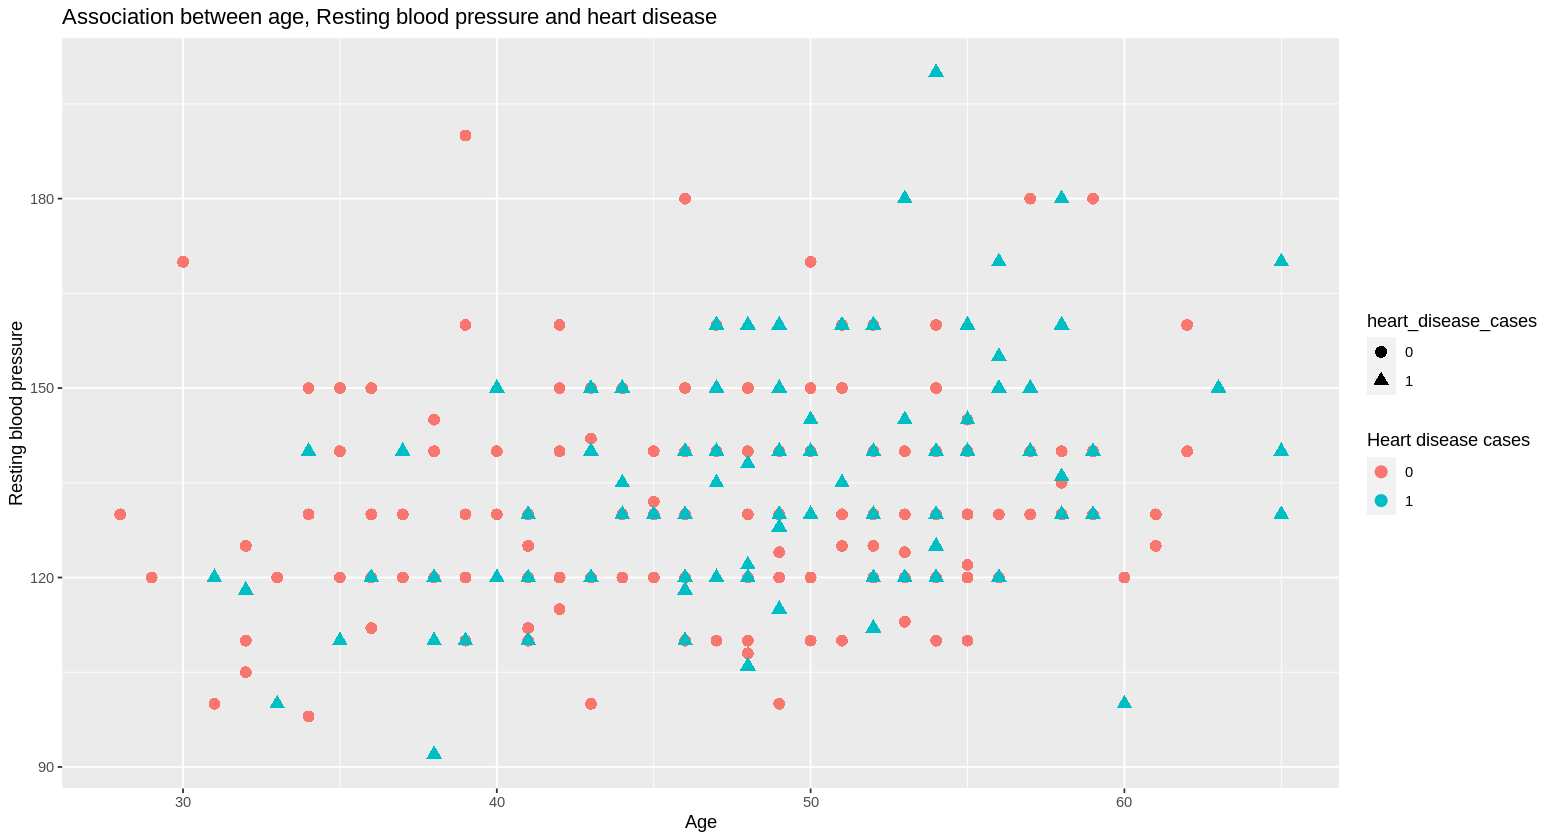

In [6]:
options(repr.plot.width = 13, repr.plot.height = 7)

heart_disease_plot <- heart_disease_hungarian |> 
    ggplot(aes(x = age, y = resting_blood_pressure, color = heart_disease_cases)) + 
        geom_point(size = 3) +
        labs(x = "Age", y = "Resting blood pressure", color = "Heart disease cases", title = "Association between age, Resting blood pressure and heart disease")

heart_disease_plot <- heart_disease_plot + 
       scale_fill_brewer(palette = "YlOrRd")
heart_disease_plot

##### Explanation of Data Graph:
Based on the graph, there does not appear to be a significant relationship between blood pressure and heart disease. However, heart disease diagnoses are most prevalent in patients aged 45-60, indicating a strong correlation between age and heart disease cases.

##### Forward Selection:
Our analysis attempts to find the best predictors for the most accurate classification model for our data set. We will achieve this by performing forward selection. We must first extract column names, create an empty tibble, and store its results.

In [7]:
heart_disease_hungarian <- heart_disease_hungarian |>
                        select(heart_disease_cases, age, resting_blood_pressure, maximum_heart_rate_achieved, cholesterol)
heart_disease_hungarian

names <- colnames(heart_disease_hungarian |> select(-heart_disease_cases))

accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

heart_disease_cases,age,resting_blood_pressure,maximum_heart_rate_achieved,cholesterol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,28,130,185,132
0,29,120,160,243
0,30,170,170,237
⋮,⋮,⋮,⋮,⋮
1,56,155,150,342
1,58,180,110,393
1,65,130,115,275


Next, we will create our model specification and perform a 5-fold cross-validation. Additionally, for the purpose of feature selection, we will store the number of predictors and the selected predictors.

In [8]:
set.seed(27)
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

heart_disease_vfold <- vfold_cv(heart_disease_hungarian, v = 5, strata = heart_disease_cases)

n_total <- length(names)

selected <- c()

The following code has been taken directly from the textbook since forward selection is beyond the scope of our knowledge in DSCI100.

In [9]:
set.seed(27)
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("heart_disease_cases", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease_hungarian) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_disease_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_disease_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,heart_disease_cases ~ maximum_heart_rate_achieved,0.6673045
2,heart_disease_cases ~ maximum_heart_rate_achieved+cholesterol,0.6819147
3,heart_disease_cases ~ maximum_heart_rate_achieved+cholesterol+age,0.6816378
4,heart_disease_cases ~ maximum_heart_rate_achieved+cholesterol+age+resting_blood_pressure,0.6778769


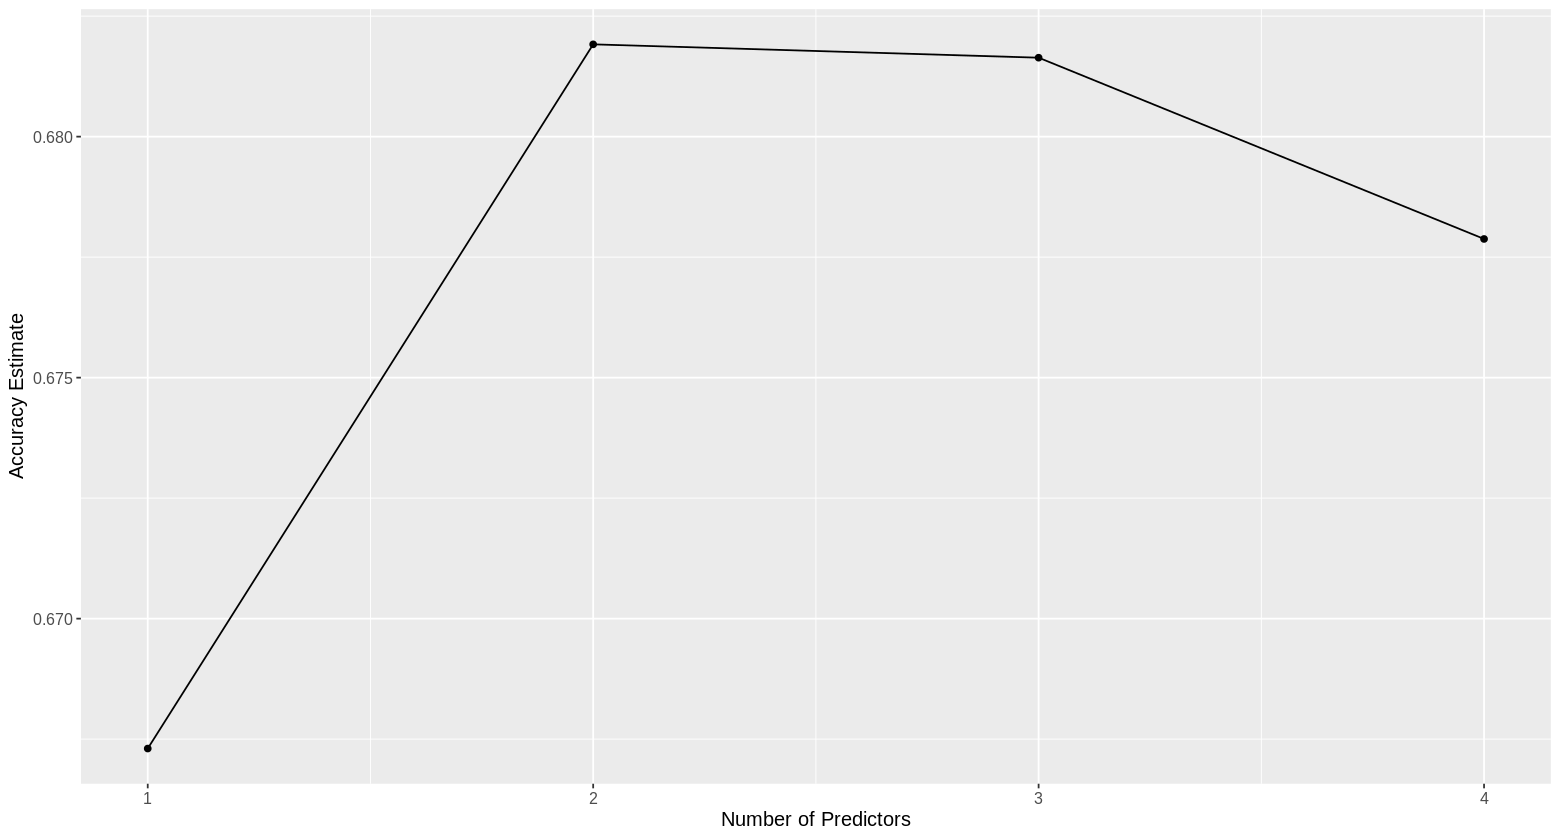

In [10]:
accuracy_vs_k <- ggplot(accuracies, aes(x = size, y = accuracy)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Predictors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

Upon analyzing the plot of the number of predictors versus the accuracy estimate, we observe that the most accurate estimate is achieved with two predictors for this dataset.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



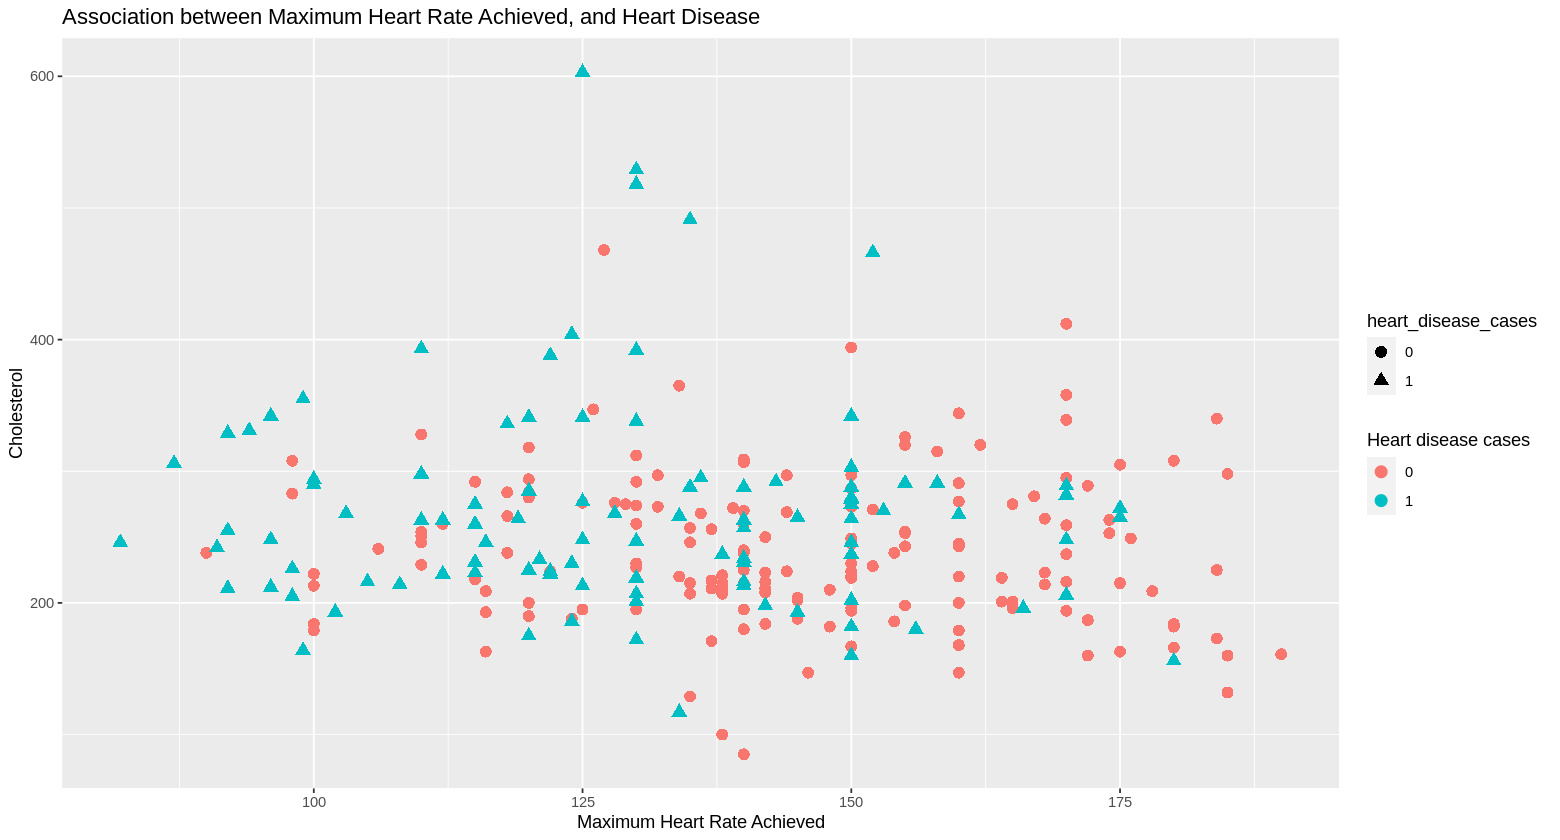

In [11]:
options(repr.plot.width = 13, repr.plot.height = 7)

heart_disease_plot_best <- heart_disease_hungarian |> 
    ggplot(aes(x = maximum_heart_rate_achieved, y = cholesterol, color = heart_disease_cases)) + 
        geom_point(size = 3) +
        labs(x = "Maximum Heart Rate Achieved", y = "Cholesterol", color = "Heart disease cases", title = "Association between Maximum Heart Rate Achieved, and Heart Disease")

heart_disease_plot <- heart_disease_plot + 
       scale_fill_brewer(palette = "YlOrRd")
heart_disease_plot_best

We now have a visualization using the best numerical classifying predictors from this data set.

### Discussion:
#### What did we find?
Using the modeling techniques we employed, we were able to identify the most accurate predictors for heart disease. Our analysis revealed that the combination of the maximum heart rate and cholesterol variables yielded the highest accuracy estimate of 68.19%, as shown in the table and plot that identified these two predictors as the most accurate. The other predictor combinations also had relatively high accuracies, ranging from 66.73% to 68.16%. While our estimated accuracy is far from perfect, this information could be used to recommend patients for further testing. For instance, if a patient's test results indicate elevated cholesterol and high maximum heart rate levels, we can suggest they undergo further testing based on our findings.

#### Is this what we expected?
We expected to find strong associations between age and heart disease, as well as with other variables such as maximum heart rate and cholesterol. While we did observe that increased levels of cholesterol and maximum heart rate impacted the chance of having heart disease, we were surprised to find that age was not a strong predictor for accurately predicting heart disease. The first graph showed that older patients between the ages of 45 to 55 were more likely to have tested positive for heart disease, but we also found positive cases as early as 31. However, given the unknown patient selection process and dataset details, we cannot draw definitive conclusions about the relationship between age and heart disease.

#### What impacts do these findings have?
Our findings can contribute to identifying whether or not patients should undergo further testing for heart disease based on their levels of cholesterol or maximum heart rate achieved. This preventive measure could truly help the population of patients at high risk of heart disease or even the general community who naturally experience higher levels of our predictor variables. This research is aimed at contributing to the medical knowledge we already have and advocating for health and prevention of this cardiovascular disease.

Our findings can contribute to identifying whether patients should undergo further testing for heart disease based on their levels of cholesterol or maximum heart rate achieved. This is a preventative measure that could truly help the population of patients at high risk of heart disease or even the general community who naturally experience higher levels of our predictor variables. This research is conducted to contribute to the existing medical knowledge and to advocate for health and prevention of this cardiovascular disease.

#### What future questions does this lead to?
Our findings lead to many questions such as: What other variables other than cholesterol and maximum heart rate achieved have the potential of leading people to become predisposed for heart disease? How can we make these tests more accessible for the people who are more at risk? What are the ideal levels of cholesterol and maximum heart rate that patients should strive to achieve if they are predisposed? How could people prevent heart disease with this new information?

### References:
- Ashley, E. A., Raxwal, V., & Froelicher, V. (2001). An evidence-based review of the resting electrocardiogram as a screening technique for heart disease. Progress in Cardiovascular Diseases, 44(1), 55–67. https://doi.org/10.1053/pcad.2001.24683
- He, K., Chen, X., Shi, Z., Shi, S., Tian, Q., Hu, X., Song, R., Bai, K., Shi, W., Wang, J., Li, H., Ding, J., Geng, S., & Sheng, X. (2022). Relationship of resting heart rate and blood pressure with all-cause and cardiovascular disease mortality. Public Health, 208, 80–88. https://doi.org/10.1016/j.puhe.2022.03.020 
- Maas, A. H. E. M., & Appelman, Y. E. A. (2010). Gender differences in coronary heart disease. Netherlands Heart Journal, 18(12), 598–603. https://doi.org/10.1007/s12471-010-0841-y
- Moran, A. E., Tzong, K. Y., Forouzanfar, M. H., Roth, G. A., Mensah, G. A., Ezzati, M., Murray, C. J. L., & Naghavi, M. (2014). Variations in ischemic heart disease burden by age, country, and income: the global burden of diseases, injuries, and risk factors 2010 study. Global Heart, 9(1), 91. https://doi.org/10.1016/j.gheart.2013.12.007 
- Park, C., Guallar, E., Linton, J. A., Lee, D.-C., Jang, Y., Son, D. K., Han, E.-J., Baek, S. J., Yun, Y. D., Jee, S. H., & Samet, J. M. (2013). Fasting glucose level and the risk of incident atherosclerotic cardiovascular diseases. Diabetes Care, 36(7), 1988–1993. https://doi.org/10.2337/dc12-1577 